In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# impute missing values of age and fare

df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# age column discretization
age_dsc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['age_bin'] = age_dsc.fit_transform(df[['age']])

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0


In [8]:
df['age_bin'].value_counts()

age_bin
1.0    523
2.0    188
0.0    100
3.0     69
4.0     11
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

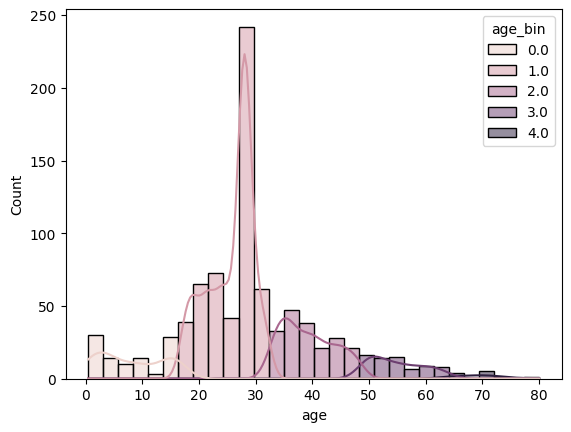

In [9]:
sns.histplot(df, x='age', hue='age_bin', kde=True)

In [10]:
# pandas manual binning
df['age_bin_pd'] = pd.cut(df['age'], bins=[0, 16, 32, 48, 64, 100], labels=['0-16', '16-32', '32-48', '48-64', '64-100'])

In [11]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_bin', 'age_bin_pd'],
      dtype='object')

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin,age_bin_pd
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0,16-32
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0,32-48
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,16-32
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0,32-48
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0,32-48


<Axes: xlabel='age', ylabel='Count'>

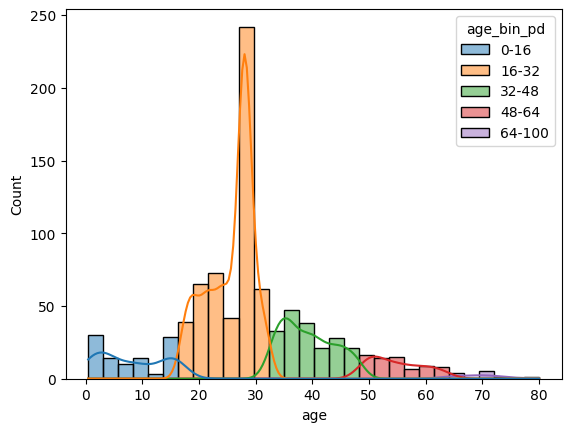

In [13]:
sns.histplot(df, x='age', hue='age_bin_pd', kde=True)

In [15]:
data = sns.load_dataset('tips')
day_dummies = pd.get_dummies(data['day'])
day_dummies

,Thur,Fri,Sat,Sun
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
239,False,False,True,False
240,False,False,True,False
241,False,False,True,False
242,False,False,True,False


In [16]:
sex_dummies = pd.get_dummies(data.sex)
sex_dummies

,Male,Female
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
239,True,False
240,False,True
241,True,False
242,True,False


In [18]:
get_dummies = pd.get_dummies(data, columns=['day'])
get_dummies

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,False,False,False,True
1,10.34,1.66,Male,No,Dinner,3,False,False,False,True
2,21.01,3.50,Male,No,Dinner,3,False,False,False,True
3,23.68,3.31,Male,No,Dinner,2,False,False,False,True
4,24.59,3.61,Female,No,Dinner,4,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,False,False,True,False
240,27.18,2.00,Female,Yes,Dinner,2,False,False,True,False
241,22.67,2.00,Male,Yes,Dinner,2,False,False,True,False
242,17.82,1.75,Male,No,Dinner,2,False,False,True,False
